<a href="https://colab.research.google.com/github/SurekhaBerlin/NPower-Python-Practices/blob/main/Course7Week_3_Workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploratory Data Analysis** EDA is an approach to analyzing data sets. The goal is to summarize their main characteristics with visual methods. It is used to discover patterns and anomalies, to test hypotheses, and to check assumptions.In Python, I perform EDA using summary statistics, missing value and duplicate analysis, distribution and outlier detection, correlation and relationship analysis, grouping and aggregation, time-based analysis, and visualizations using Matplotlib and Seaborn

# **Statistics**



#They are the heart of data analytics. They help us spot trends and patterns.
# They help us plan. In essence, they breathe life into data and help us derive meaning from it.
# While the individual statistical methods we use in data analytics are too numerous to count, they can be broadly divided into two main camps: descriptive statistics and inferential statistic.

#** Population** is the entire group that you wish to draw data from (and subsequently draw conclusions about).
While in day-to-day life, the word is often used to describe groups of people (such as the population of a country) in statistics, it can apply to any group from which you will collect information.

Random sampling from representative groups allows us to draw broad conclusions about an overall population. This approach is commonly used in polling.
Pollsters ask a small group of people about their views on certain topics. They can then use this information to make informed judgments about what the
larger population thinks.
This saves time, hassle, and the expense of extracting data from an entire population (which for all practical purposes is usually impossible).

[link text](https://www.geeksforgeeks.org/difference-between-descriptive-and-inferential-statistics/)

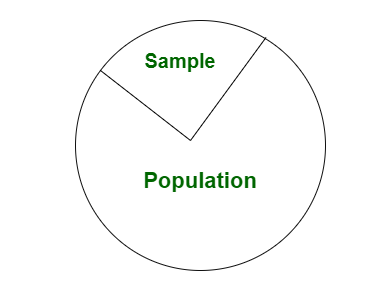

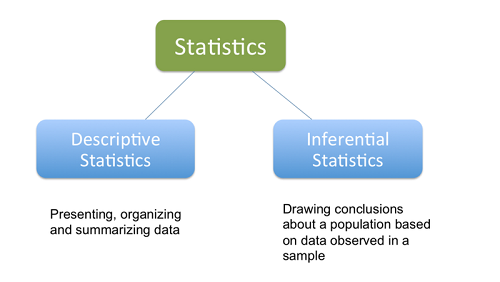

# Basic Data Understanding

Used to understand structure, size, and types.

df.head() / df.tail()

df.shape

df.info()

df.dtypes

df.columns

# Missing Value Analysis

Used to detect and analyze nulls.

df.isnull().sum()

df.isna()

df.notnull()

#Duplicate Analysis

Used to identify repeated records.

df.duplicated()

df.duplicated().sum()

df.drop_duplicates()

# Descriptive statistics:

Describe the features of populations and/or samples.
Organize and present data in a purely factual way.
Present final results visually, using tables, charts, or graphs.
Draw conclusions based on known data.
Use measures like central tendency, distribution, and variance.



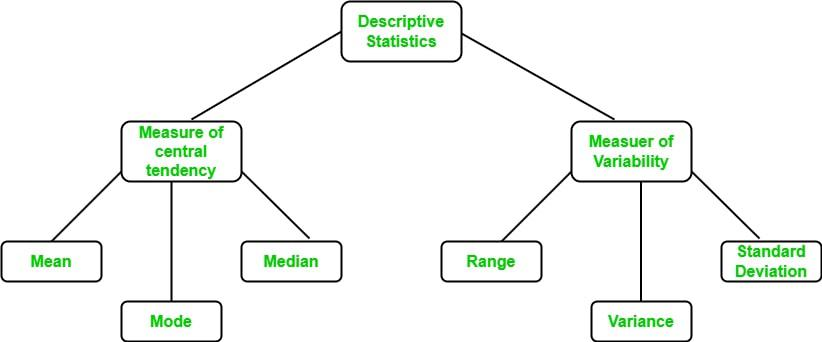

#**Seaborn for Descriptive Statistics**

Seaborn is built on top of Matplotlib and provides higher-level statistical visualizations, making it great for exploratory data analysis.

**Advantages:**

Built-in statistical functions: Provides boxplots, violin plots, and histograms with KDE (Kernel Density Estimation).

Easier to use: Requires less code for complex plots.

Works well with Pandas: Can directly plot from DataFrames.

Better aesthetics: Has built-in themes and color palettes.

#Distribution Analysis

Used to understand how values are spread.

Histogram → plt.hist()

Boxplot → plt.boxplot()

KDE plot

Violin plot

#Outlier Detection

Used to detect extreme values.

Boxplot

IQR method

Z-score

Scatter plot

#Boxplot : Shows Distribution at a Glance

It quickly summarizes the spread and center of the data.

Displays the median (middle value) and the quartiles (Q1, Q2, Q3).

Highlights Outliers


Easy to compare distributions across different groups side by side (e.g., exam scores of different classes).

Identifies Skewness :If the median is not centered inside the box, or the whiskers are uneven, it shows skewed data (not symmetric).

Summarizes Large Data:Instead of showing all values, it gives a compact summary of the data’s range and variability.

**Example**

If you plot the salaries of employees in different departments, a boxplot will let you quickly see:

Which department has higher typical salaries (median).

Which department has a wider pay gap (spread).

If any department has unusually high or low salaries (outliers).

/tmp/ipython-input-1049185683.py:18: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([


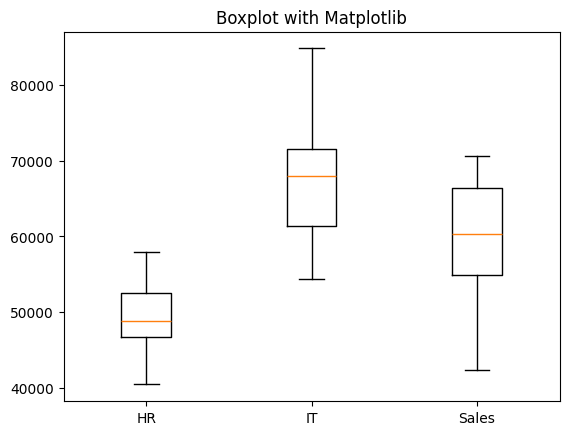

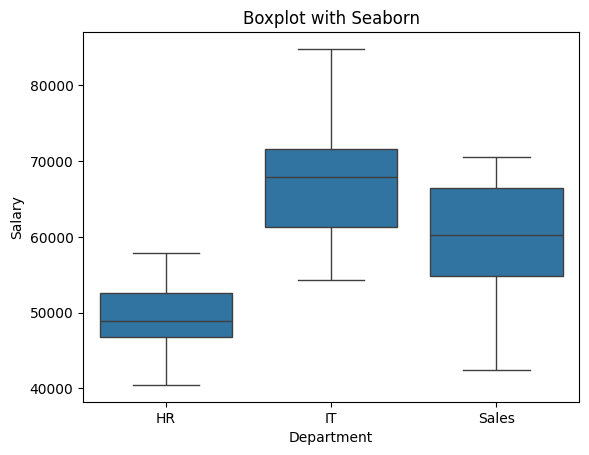

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Simple dataset
np.random.seed(42)
df = pd.DataFrame({
    "Department": np.repeat(["HR", "IT", "Sales"], 20),
    "Salary": np.concatenate([
        np.random.normal(50000, 5000, 20),   # HR
        np.random.normal(70000, 8000, 20),   # IT
        np.random.normal(60000, 10000, 20)   # Sales
    ])
})

# Matplotlib Boxplot
plt.boxplot([
    df[df["Department"] == "HR"]["Salary"],
    df[df["Department"] == "IT"]["Salary"],
    df[df["Department"] == "Sales"]["Salary"]
], labels=["HR", "IT", "Sales"])
plt.title("Boxplot with Matplotlib")
plt.show()

# Seaborn Boxplot
sns.boxplot(x="Department", y="Salary", data=df)
plt.title("Boxplot with Seaborn")
plt.show()


📊 What is a Percentile?

A percentile tells you how a value compares to the rest of the data.

✅ Simple Definition

A percentile indicates the value below which a certain percentage of the data falls.

🔢 Example

Data (sorted):

[10, 20, 30, 40, 50]


25th percentile (Q1) → 20
→ 25% of values are below or equal to 20

50th percentile (Median / Q2) → 30
→ 50% of values are below this value

75th percentile (Q3) → 40
→ 75% of values are below this value

📌 Real-life Example

If you scored in the 90th percentile on a test, it means:

You scored better than 90% of the students


📦 What is IQR (Interquartile Range)?
✅ Simple Definition

IQR measures the spread of the middle 50% of the data.

📏 Formula
IQR = Q3 − Q1


The lower whisker goes to the smallest data value ≥ (Q1 − 1.5 × IQR)

The upper whisker goes to the largest data value ≤ (Q3 + 1.5 × IQR)

👉 Values outside these limits are plotted as outliers, not part of the whiskers

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Simple dataset
np.random.seed(42)
df = pd.DataFrame({
    "Department": np.repeat(["HR", "IT", "Sales"], 20),
    "Salary": np.concatenate([
        np.random.normal(50000, 5000, 20),   # HR
        np.random.normal(70000, 8000, 20),   # IT
        np.random.normal(60000, 10000, 20)   # Sales
    ])
})


df[df['Department']=='IT']['Salary']

,Salary
20,81725.190151
21,68193.789596
22,70540.225638
23,58602.014510
24,65644.938204
25,70887.380718
26,60792.051381
27,73005.584147
28,65194.890481
29,67666.450002


**The seaborn boxplot** is a very basic plot Boxplots are used to visualize distributions.Thats very useful when you want to compare data between two groups.

Sometimes a boxplot is named a box-and-whisker plot. Any box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution.

The sns.boxplot() function in Seaborn is used to visualize the distribution of numerical data through quartiles and detect outliers.

**How a Box Plot Works**

Box (IQR): The middle 50% of the data (from Q1 to Q3).

Median Line: The middle value (Q2) inside the box.

Whiskers: Extend to the lowest and highest values within 1.5 × IQR.

Outliers: Dots outside the whiskers, showing extreme values.

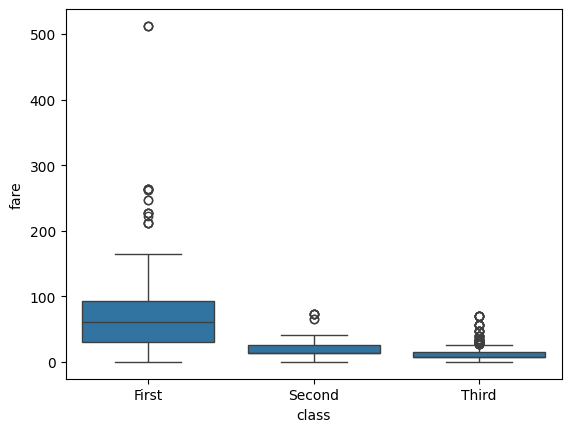

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load Titanic dataset
titanic = sns.load_dataset("titanic")

# Box plot of fares for different classes
sns.boxplot(x="class", y="fare", data=titanic)

plt.show()


🔹 Interpretation:

The median fare is highest for First Class.

The spread of fares is largest for First Class.

There are outliers (dots) in First and Second Class fares.

**Seaborn provides built-in datasets that are useful for practicing data visualization and statistical analysis. You can access these datasets using sns.load_dataset().**




In [ ]:
import seaborn as sns

# List all available datasets
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
titanic = sns.load_dataset('titanic')

In [ ]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


#Summary Statistics

Used to understand distribution and central tendency.

df.describe()

df.mean()

df.median()

df.mode()

df.std()

df.min() / df.max()

df.nunique()

**Let's try to understand our data by using different methodologies**

**describe()**

Provides summary statistics for numerical columns.

Includes count, mean, standard deviation, min, max, and quartiles.

---



In [ ]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**info()**

Provides metadata about the DataFrame.

Displays the number of non-null values, data types, and memory usage.

In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


Boxplot: Compare scores of different classes quickly.

Histogram: See how often scores fall into ranges (e.g., 50–60, 60–70).

Displot: See whether the distribution is normal, skewed, or has multiple peaks.

**A Displot or distribution plot**, depicts the variation in the data distribution. Seaborn Distplot represents the overall distribution of continuous data variables.

The Seaborn module along with the Matplotlib module is used to depict the distplot with different variations in it. The Distplot depicts the data by a histogram and a line in combination to it.

---



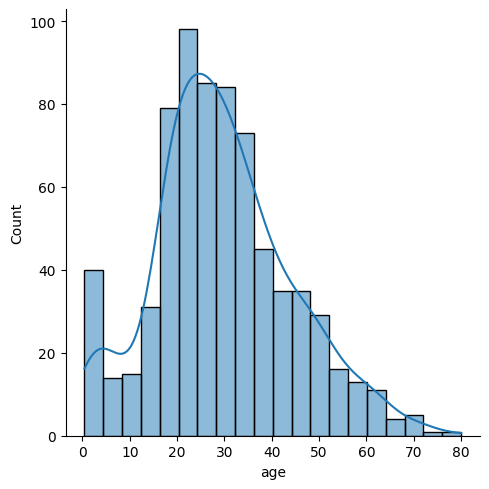

In [ ]:
import matplotlib.pyplot as plt
sns.displot(titanic['age'],kde=True)
plt.show()

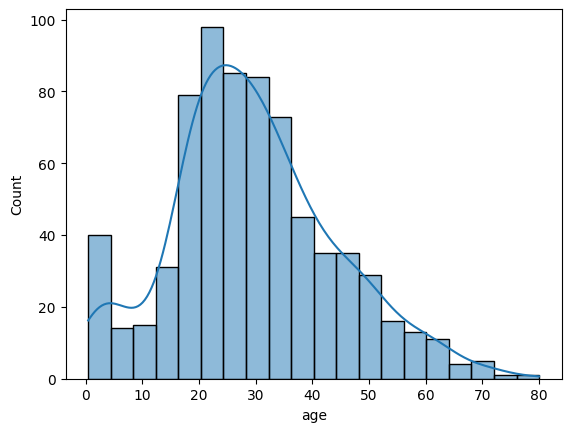

In [ ]:
import matplotlib.pyplot as plt
sns.histplot(titanic['age'],kde=True)
plt.show()

#Grouping & Aggregation

Used to summarize data by categories.

groupby()

agg() (mean, sum, count, max, min)

Pivot tables → pd.pivot_table()

#Categorical Data Analysis

Used to analyze non-numeric data.

value_counts()

Bar charts

Pie charts

Grouped bar charts

In [ ]:
titanic['age'].value_counts()

,count
age,
24.00,30
22.00,27
18.00,26
28.00,25
30.00,25
...,...
24.50,1
0.67,1
0.42,1


**A groupby operation** involves some combination of splitting the object, applying a function, and combining the results. This can be used to group large amounts of data and compute operations on these groups.


DataFrame.groupby(by=None, axis=0, level=None, as_index=True, sort=True, group_keys=_NoDefault.no_default, squeeze=_NoDefault.no_default, observed=False, dropna=True)[source]
Group DataFrame using a mapper or by a Series of columns.



In [ ]:
#GROUP BY: SINGLE GROUP SINGLE COLUMN

# titanic.groupby(['pclass'])['survived'].sum()

titanic.groupby(['pclass'])['survived'].sum()

#select pclass,count(survived) from Titanic group by pclass

# titanic.groupby(['pclass'])['survived'].mean()

,survived
pclass,
1,136
2,87
3,119


In [ ]:
titanic['survived'].head()

,survived
0,0
1,1
2,1
3,1
4,0


In [ ]:
#GROUP BY: SINGLE GROUP multiple COLUMN

# titanic.groupby(['pclass'])[['survived','fare']].mean()


titanic.groupby(['pclass'])[['survived','fare']].mean()

,survived,fare
pclass,,
1,0.629630,84.154687
2,0.472826,20.662183
3,0.242363,13.675550


In [ ]:
#GROUP BY: multiple GROUP multiple COLUMN

titanic.groupby(['pclass','sex'])[['survived','fare']].mean()

survived        fare
pclass sex                         
1      female  0.968085  106.125798
       male    0.368852   67.226127
2      female  0.921053   21.970121
       male    0.157407   19.741782
3      female  0.500000   16.118810
       male    0.135447   12.661633

In [ ]:
#GROUP BY: multiple GROUP multiple COLUMN
titanic.groupby(['pclass','sex'],as_index=False)[['survived','fare']].sum()

,pclass,sex,survived,fare
0,1,female,91,9975.8250
1,1,male,45,8201.5875
2,2,female,70,1669.7292
3,2,male,17,2132.1125
4,3,female,72,2321.1086
5,3,male,47,4393.5865


In [ ]:
#GROUP BY: one GROUP multiple functions


titanic.groupby(['pclass'])['survived'].agg(['sum','mean','min','max'])

#sum(survived),max(survived)

,sum,mean,min,max
pclass,,,,
1,136,0.629630,0,1
2,87,0.472826,0,1
3,119,0.242363,0,1


In [ ]:

titanic.groupby('sex')[['survived']].mean()

,survived
sex,
female,0.742038
male,0.188908


In [ ]:
#group by one column with different aggregate functions on different columns
titanic.groupby(['pclass']).agg({'survived': 'sum', 'fare': 'mean'})

,survived,fare
pclass,,
1,136,84.154687
2,87,20.662183
3,119,13.675550


In [ ]:
titanic.groupby(['sex', 'class'])['survived'].aggregate('mean').unstack()


# This immediately gives us some insight: overall, three of every four females on board survived,
# while only one in five males survived!This is useful, but we might like to go one step deeper and look at
# survival by both sex and, say, class. Using the vocabulary of GroupBy, we might proceed using something like this:
# we group by class and gender, select survival, apply a mean aggregate, combine the resulting groups,
# and then unstack the hierarchical index to reveal the hidden multidimensionality.

<ipython-input-30-bb166f64f8d3>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  titanic.groupby(['sex', 'class'])['survived'].aggregate('mean').unstack()


class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


#Pivot Table

**Time to build a pivot table in Python using the awesome Pandas library! We will explore the different facets of a pivot table in this article and build an awesome, flexible excel-style pivot table from scratch**

In [ ]:
#Pivot Table

titanic.pivot_table('survived', index='sex', columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [ ]:
#Multilevel pivot table
# You can even use more than one feature as an index to group your data.
# This increases the level of granularity in the resultant table, and you can get more specific with your findings:
# For example, we might be interested in
# looking at age as a third dimension. We'll bin the age using the pd.cut function:

agegroups = pd.cut(titanic['age'], [0, 18,50, 80])
df_pivot=titanic.pivot_table('survived', ['sex', agegroups],'class',aggfunc='sum')
df_pivot

<ipython-input-31-261dbff76357>:8: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df_pivot=titanic.pivot_table('survived', ['sex', agegroups],'class',aggfunc='sum')


class            First  Second  Third
sex    age                           
female (0, 18]      10      14     22
       (18, 50]     59      52     24
       (50, 80]     13       2      1
male   (0, 18]       4       9     11
       (18, 50]     31       5     27
       (50, 80]      5       1      0

In [ ]:
# We can apply the same strategy when working with the columns as well;
# let's add info on the fare paid using pd.qcut to automatically compute quantiles:

fare = pd.qcut(titanic['fare'], 4)
titanic.pivot_table('survived', ['sex', agegroups], [fare, 'class'],aggfunc='sum')

fare            (-0.001, 7.91]              (7.91, 14.454]               \
class                    First Second Third          First Second Third   
sex    age                                                                
female (0, 18]               0      0     5              0      3    10   
       (18, 50]              0      0     9              0     22     6   
       (50, 80]              0      0     0              0      0     1   
male   (0, 18]               0      0     0              0      0     6   
       (18, 50]              0      0    11              0      4    11   
       (50, 80]              0      0     0              0      1     0   

fare            (14.454, 31.0]              (31.0, 512.329]               
class                    First Second Third           First Second Third  
sex    age                                                                
female (0, 18]               0      8     6              10      3     1  
       (18, 50]              6     25     8              53      5     1  
       (50, 80]              1      2     0              12      0     0  
male   (0, 18]               0      6     4               4      3     1  
       (18, 50]             13      1     2              18      0     3  
       (50, 80]              3      0     0               2      0     0

#More arguments in pivot_table
import pandas as pd
df=DataFrame.pivot_table(data, values=None, index=None, columns=None,
                      aggfunc='mean', fill_value=None, margins=False,
                      dropna=True, margins_name='All')


In [ ]:
titanic.pivot_table(['survived','fare'],index='sex', columns='class',
                    aggfunc={ 'fare':'mean', 'survived':'sum'})

fare                       survived             
class        First     Second      Third    First Second Third
sex                                                           
female  106.125798  21.970121  16.118810       91     70    72
male     67.226127  19.741782  12.661633       45     17    47

In [ ]:
titanic.pivot( columns=['survived'])  #we do not want to use Pivot()

pclass          sex           age       sibsp      parch       ...  \
survived      0    1       0       1     0     1     0    1     0    1  ...   
0           3.0  NaN    male     NaN  22.0   NaN   1.0  NaN   0.0  NaN  ...   
1           NaN  1.0     NaN  female   NaN  38.0   NaN  1.0   NaN  0.0  ...   
2           NaN  3.0     NaN  female   NaN  26.0   NaN  0.0   NaN  0.0  ...   
3           NaN  1.0     NaN  female   NaN  35.0   NaN  1.0   NaN  0.0  ...   
4           3.0  NaN    male     NaN  35.0   NaN   0.0  NaN   0.0  NaN  ...   
..          ...  ...     ...     ...   ...   ...   ...  ...   ...  ...  ...   
886         2.0  NaN    male     NaN  27.0   NaN   0.0  NaN   0.0  NaN  ...   
887         NaN  1.0     NaN  female   NaN  19.0   NaN  0.0   NaN  0.0  ...   
888         3.0  NaN  female     NaN   NaN   NaN   1.0  NaN   2.0  NaN  ...   
889         NaN  1.0     NaN    male   NaN  26.0   NaN  0.0   NaN  0.0  ...   
890         3.0  NaN    male     NaN  32.0   NaN   0.0  NaN   0.0  NaN  ...   

         adult_male        deck       embark_town              alive       \
survived          0      1    0    1            0            1     0    1   
0              True    NaN  NaN  NaN  Southampton          NaN    no  NaN   
1               NaN  False  NaN    C          NaN    Cherbourg   NaN  yes   
2               NaN  False  NaN  NaN          NaN  Southampton   NaN  yes   
3               NaN  False  NaN    C          NaN  Southampton   NaN  yes   
4              True    NaN  NaN  NaN  Southampton          NaN    no  NaN   
..              ...    ...  ...  ...          ...          ...   ...  ...   
886            True    NaN  NaN  NaN  Southampton          NaN    no  NaN   
887             NaN  False  NaN    B          NaN  Southampton   NaN  yes   
888           False    NaN  NaN  NaN  Southampton          NaN    no  NaN   
889             NaN   True  NaN    C          NaN    Cherbourg   NaN  yes   
890            True    NaN  NaN  NaN   Queenstown          NaN    no  NaN   

          alone         
survived      0      1  
0         False    NaN  
1           NaN  False  
2           NaN   True  
3           NaN  False  
4          True    NaN  
..          ...    ...  
886        True    NaN  
887         NaN   True  
888       False    NaN  
889         NaN   True  
890        True    NaN  

[891 rows x 28 columns]

pivot is a simpler method that is used to reshape data by specifying the index, columns, and values of a DataFrame, while pivot_table is a more powerful method that is used to create a pivot table from a DataFrame. pivot_table allows for aggregation of the data and can handle duplicate values, whereas pivot does not.



One major difference between the pivot and pivot_table methods is that pivot_table allows for aggregation of the data, whereas pivot does not. This means that pivot_table can be used to calculate statistics such as sum, mean, or count, while pivot can only reshape the data without performing any calculations.



Another difference between the two methods is that pivot_table can handle duplicate values in the index and columns arguments, while pivot cannot. If there are duplicate values in the index or columns arguments when using pivot, a ValueError will be raised. pivot_table, on the other hand, can handle duplicate values by using the aggfunc argument to specify the aggregation function to be used.



Another difference between the two methods is that pivot_table can handle duplicate values in the index and columns arguments, while pivot cannot. If there are duplicate values in the index or columns arguments when using pivot, a ValueError will be raised. pivot_table, on the other hand, can handle duplicate values by using the aggfunc argument to specify the aggregation function to be used.

In [ ]:
#https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html

#Relationship Analysis

Used to find relationships between variables.

Correlation matrix → df.corr()

Heatmap

Scatter plot

Pair plot

**Scatter plot**  : **Continuous numerical variables** are variables that may contain any value within some range. They can be of type "int64" or "float64". A great way to visualize these variables is by using scatterplots with fitted lines.

In order to start understanding the (linear) relationship ,we can use "regplot" which plots the scatterplot plus the fitted regression line for the data. This will be useful later on for visualizing the fit of the simple linear regression model as well.

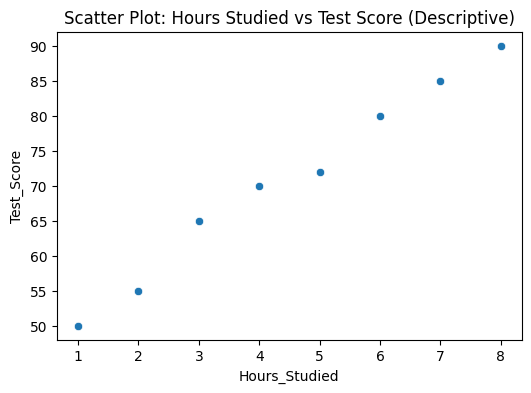

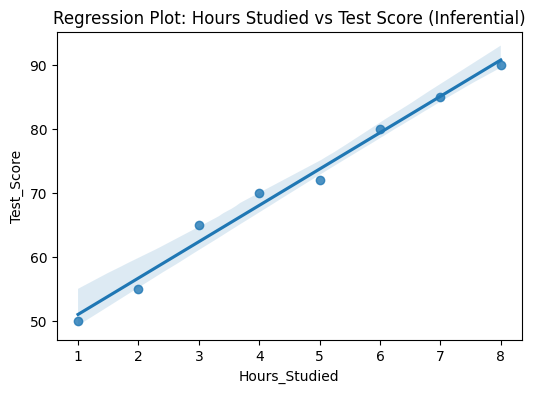

In [ ]:
# Import libraries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Sample data
data = pd.DataFrame({
    'Hours_Studied': [1, 2, 3, 4, 5, 6, 7, 8],
    'Test_Score': [50, 55, 65, 70, 72, 80, 85, 90],
    'Attendance': [60, 65, 70, 75, 80, 85, 90, 95]
})

# Scatter Plot (Descriptive)
plt.figure(figsize=(6,4))
sns.scatterplot(x='Hours_Studied', y='Test_Score', data=data)
plt.title('Scatter Plot: Hours Studied vs Test Score (Descriptive)')
plt.show()

# Regression Plot (Inferential)
plt.figure(figsize=(6,4))
sns.regplot(x='Hours_Studied', y='Test_Score', data=data)
plt.title('Regression Plot: Hours Studied vs Test Score (Inferential)')
plt.show()


Scatter plot: Shows the relationship between hours studied and test score. Purely descriptive – no trend line, just observation.

Regression plot: Adds a trend line, helping to infer how Test_Score changes with Hours_Studied. Useful for prediction and understanding relationships.


# Inferential statistics:

Use samples to make generalizations about larger populations.
Help us to make estimates and predict future outcomes.
Present final results in the form of probabilities.
Draw conclusions that go beyond the available data.
Use techniques like hypothesis testing, confidence intervals, and regression and correlation analysis.

<Axes: xlabel='age', ylabel='fare'>

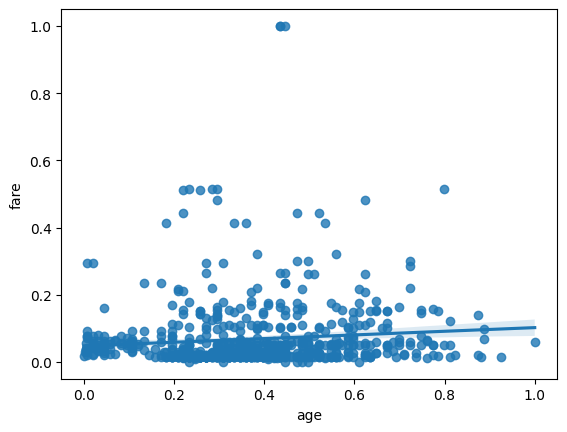

In [ ]:
import matplotlib.pyplot as plt
#This is called Min-Max Scaling or Feature Scaling.

titanic['age'] = (titanic['age'] - titanic['age'].min()) / (titanic['age'].max() - titanic['age'].min())
titanic['fare'] = (titanic['fare'] - titanic['fare'].min()) / (titanic['fare'].max() - titanic['fare'].min())

sns.regplot(x="age", y="fare", data=titanic)


#**Correlation**
is a statistical metric for measuring to what extent different variables are interdependent. In other words, when we look at two variables over time, if one variable changes how does this affect change in the other variable?

There are three types of correlation:

**Positive Correlation:** A positive correlation means that this linear relationship is positive, and the two variables increase or decrease in the same direction.

**Negative Correlation:** A negative correlation is just the opposite. The relationship line has a negative slope, and the variables change in opposite directions, i.e., one variable decreases while the other increases.

**No Correlation:** No correlation simply means that the variables behave very differently and thus, have no linear relationship.


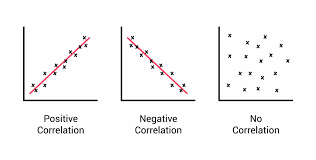

**What is Correlation Coefficient?**

Correlation coefficients gives you the measure of the strength of the linear relationship between two variables.

The letter r denotes the value, and it ranges between -1 and +1

If r < 0, it implies negative correlation

If r > 0, it implies positive correlation

If r = 0, it implies no correlation

Calculating the correlation coefficient takes time; therefore, data is entered into a calculator, computer, or statistics program to calculate the correlation coefficient.



**Pearson’s Product Moment Correlation**

The Pearson correlation coefficient is defined in statistics as the measurement of the strength of the relationship between two variables and their association. It is denoted by r.

The correlation coefficient can be calculated by using the below formula:

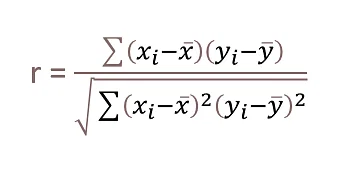




r = Coefficient of correlation

xbar = Mean of x-variable

ybar = Mean of y-variable

xi yi  = Samples of variable x,y


In [ ]:
titanic.corr()

ValueError: could not convert string to float: 'male'

#Convert categorical values to numerical

In [ ]:
# Convert 'sex' column to numeric (0 for female, 1 for male)
titanic['sex'] = titanic['sex'].map({'male': 1, 'female': 0})

In [ ]:
#Using pd.get_dummies() (for multiple categorical columns)
titanic_numeric = pd.get_dummies(titanic, drop_first=True)
correlation_matrix = titanic_numeric.corr()
print(correlation_matrix)

# What this does

# Converts categorical columns (like Sex, Embarked, Pclass) into numeric columns

# This process is called one-hot encoding

                         survived    pclass       age     sibsp     parch  \
survived                 1.000000 -0.338481 -0.077221 -0.035322  0.081629   
pclass                  -0.338481  1.000000 -0.369226  0.083081  0.018443   
age                     -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
sibsp                   -0.035322  0.083081 -0.308247  1.000000  0.414838   
parch                    0.081629  0.018443 -0.189119  0.414838  1.000000   
fare                     0.257307 -0.549500  0.096067  0.159651  0.216225   
adult_male              -0.557080  0.094035  0.280328 -0.253586 -0.349943   
alone                   -0.203367  0.135207  0.198270 -0.584471 -0.583398   
sex_male                -0.543351  0.131900  0.093254 -0.114631 -0.245489   
embarked_Q               0.003650  0.221009 -0.022405 -0.026354 -0.081228   
embarked_S              -0.155660  0.081720 -0.032523  0.070941  0.063036   
class_Second             0.093349 -0.188432  0.006954 -0.055932 -0.000734   

#Heatmap using Seaborn: Purpose & Benefits

A heatmap is a graphical representation of data where values are depicted using color gradients. In Seaborn, it's commonly used to visualize correlation matrices, confusion matrices, and pivot tables.

<Axes: >

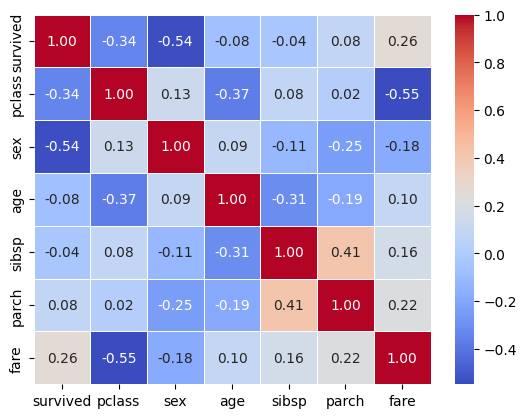

In [ ]:
sns.heatmap(titanic.select_dtypes(include=['number']).corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)


# Visualizing data with heatmaps is a great way to do exploratory data analysis,
# when you have a data set with multiple variables. Heatmaps can reveal general pattern in the dataset, instantly.
# And it is very easy to make beautiful heatmaps with Seaborn library in Python.

# Now let's plot the correlation matrix of our data with a heatmap.

#The ‘annot’ parameter is especially useful, as it writes the data value in each square.
#This way we can see the correlation coefficient.

In [ ]:
# Now what are some correlations we might look for?

# Is there a correlation between age and fare price?
# Is there a correlation between class and survival? Did rich people survive more than the working people?
# Was there a correlation between age and survival? Did they really allow "women and children first"?
# # What about the passenger's sex and survival?


# We all know the old trope that when a ship is sinking it is "women and children first" into the lifeboats.
# Did this old adage stay true on the Titanic? Did more women and children survive than grown men?
# Did people's sex, age, or class matter most on the Titanic for their survival?

# If women and children survived more than men, there would be a positive correlation between
# survival and sex and survival and age.

# We can find the correlation between any two features with the Pandas method feature.corr(feature)

titanic['survived'].corr(titanic['age'])

np.float64(-0.07722109457217768)

In [ ]:
# Step 1: Convert the "sex" column to numerical values
# 0 for male and 1 for female
titanic['sex'] = titanic['sex'].map({'male': 0, 'female': 1})

# Step 2: Check the DataFrame to confirm the conversion
titanic.head()

# # Step 3: Now, you can generate a heatmap using only numeric columns
# import seaborn as sns
# import matplotlib.pyplot as plt

# # # Select only the numeric columns for heatmap
# numeric_data = titanic.select_dtypes(include=['number'])
# numeric_data
# # Generate the heatmap
# plt.figure(figsize=(10, 8))
# sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
# plt.show()




,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,0,0.271174,1,0,0.014151,S,Third,man,True,NaN,Southampton,no,False
1,1,1,1,0.472229,1,0,0.139136,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,1,0.321438,0,0,0.015469,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,1,0.434531,1,0,0.103644,S,First,woman,False,C,Southampton,yes,False
4,0,3,0,0.434531,0,0,0.015713,S,Third,man,True,NaN,Southampton,no,True


**correlation between two columns**

In [ ]:
# Step 1: Fill NaN values with the most frequent value (mode)
titanic['sex'] = titanic['sex'].fillna(titanic['sex'].mode()[0])
titanic['survived'].corr(titanic['sex'])

np.float64(0.5433513806577555)

<ipython-input-39-5497c3c337b4>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="sex_female", y="survived", ci=None, palette="coolwarm")
<ipython-input-39-5497c3c337b4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="sex_female", y="survived", ci=None, palette="coolwarm")


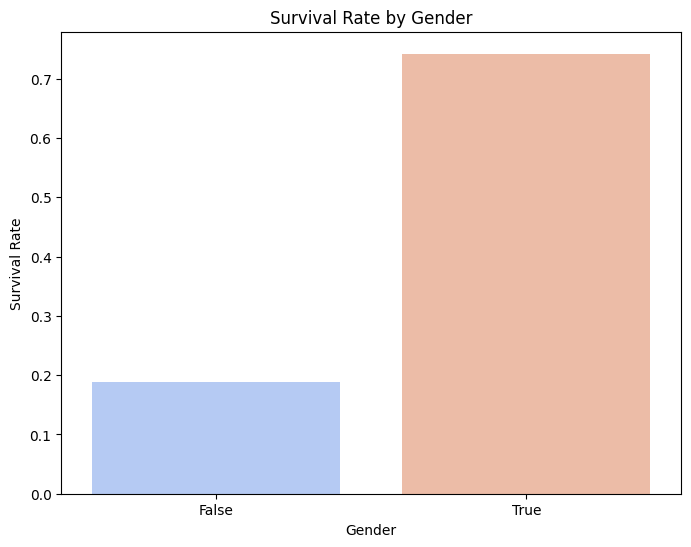

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x="sex_female", y="survived", ci=None, palette="coolwarm")

plt.title("Survival Rate by Gender")
plt.xlabel("Gender")
plt.ylabel("Survival Rate")

plt.show()



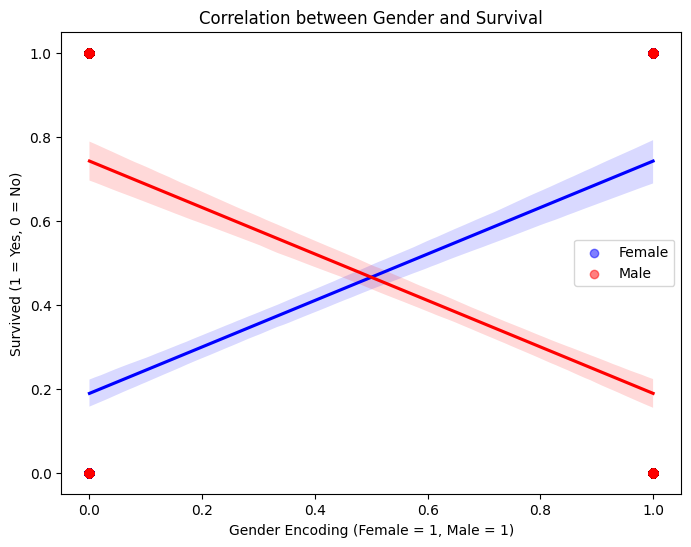

In [ ]:
plt.figure(figsize=(8, 6))

# Plot for female survival
sns.regplot(data=df, x="sex_female", y="survived", label="Female", scatter_kws={'alpha':0.5}, color='blue')

# Plot for male survival
sns.regplot(data=df, x="sex_male", y="survived", label="Male", scatter_kws={'alpha':0.5}, color='red')

# Customize plot
plt.title("Correlation between Gender and Survival")
plt.xlabel("Gender Encoding (Female = 1, Male = 1)")
plt.ylabel("Survived (1 = Yes, 0 = No)")
plt.legend()
plt.show()


In [ ]:
# str.get_dummies creates dummy (integer) variables that correspond to the string values,
# and corrwith is another way to compute correlation when you need to do so between a mixture
# of rows and columns (corr just works with columns only).

# NOTE–Correlation is expressed as a number between -1 and 1, but correlation is not the probability that something occurs.

In [ ]:
# Positive 1—1.000 means that there is a perfect, positive correlation between two features, as one feature goes up,
#the other goes up exactly in proportion. If there is a negative number

# Zero 1—0.000 means there is no correlation positive or negative between two features. They move completely
#at random to one another.

# Negative 1—-1.000 means that there is a perfect, negative or inverse correlation between two features. As one feature goes up, the other goes down and vise versa.

# –1. A perfect negative (downward sloping) linear relationship
# –0.70. A strong negative (downward sloping) linear relationship
# –0.50. A moderate negative (downhill sloping) relationship
# –0.30. A weak negative (downhill sloping) linear relationship
# 0. No linear relationship
# +0.30. A weak positive (upward sloping) linear relationship
# +0.50. A moderate positive (upward sloping) linear relationship
# +0.70. A strong positive (upward sloping) linear relationship
# +1. A perfect positive (upward sloping) linear relationship

In [ ]:
https://makeschool.org/mediabook/oa/tutorials/titanic-dataset-tutorial-an-intro-to-data-analysis-and-statistics-n40/probability/

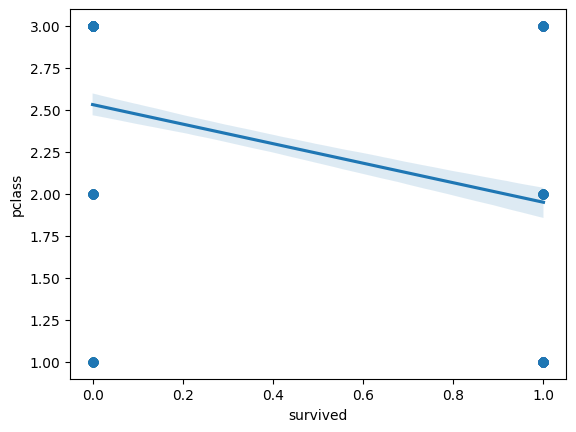

In [ ]:
import matplotlib.pyplot as plt
sns.regplot(x="survived", y="pclass", data=titanic)
plt.show()

<AxesSubplot:xlabel='pclass', ylabel='survived'>

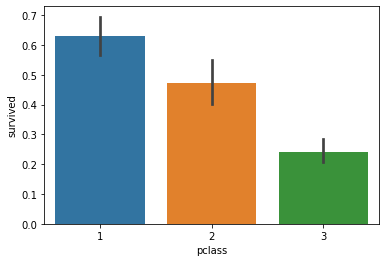

In [ ]:
sns.barplot(x='pclass', y='survived', data=titanic)

<AxesSubplot:xlabel='survived', ylabel='pclass'>

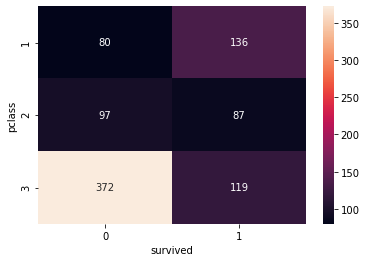

In [ ]:
group = titanic.groupby(['pclass', 'survived'])
pclass_survived = group.size().unstack()

# Heatmap - Color encoded 2D representation of data.
sns.heatmap(pclass_survived, annot = True, fmt ="d")

In [ ]:
titanic[['pclass', 'survived']].groupby(['pclass'], as_index=False).mean().sort_values(by='survived', ascending=False)

,pclass,survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [ ]:
https://github.com/viswanathanc/statistics/blob/master/Titanic%20Chi%20Square%20test%20-%20PClass%20vs%20Survied.ipynb

In [ ]:
# The input variables that we give to our machine learning models are called features.
#  Each column in our dataset constitutes a feature.


#  To train an optimal model, we need to make sure that we use only the essential features. If we have too many features, the model can capture
#  the unimportant patterns and learn from noise. # The method of choosing the important parameters of our data is called Feature Selection.

# Feature Selection is the method of reducing the input variable to your model by using only relevant data and getting rid of noise in data.

# It is the process of automatically choosing relevant features for your machine learning model based on the type of problem you are trying to solve.
#  We do this by including or excluding important features without changing them. It helps in cutting down the noise in our data and reducing the size
# of our input data.

In [ ]:
# Feature selection models are of two types:

# Supervised Models: Supervised feature selection refers to the method which uses the output label class for feature selection.
# They use the target variables to identify the variables which can increase the efficiency of the model

# Unsupervised Models: Unsupervised feature selection refers to the method which does not need the output label class for feature selection.
#  We use them for unlabelled data.


# Filter Method: In this method, features are dropped based on their relation to the output, or how they are correlating to the output.
#  We use correlation to check if the features are positively or negatively correlated to the output labels and drop features accordingly.
# Eg: Pearson Correlation Coefficent, Chi-Square Test, Fisher’s Score, etc.

# Wrapper Method: We split our data into subsets and train a model using this. Based on the output of the model, we add and subtract features and train the model again.
#  It forms the subsets using a greedy approach and evaluates the accuracy of all the possible combinations of features.
#   Eg: Forward Selection, Backwards Elimination, etc.

# . Intrinsic Method: This method combines the qualities of both the Filter and Wrapper method to create the best subset.

In [ ]:
# After all descriptive analysis step such as summarization, visualizing, etc, then we are closer to enter the modeling part. Before getting to modeling,
#a feature selection is needed

# Feature selection is one of machine learning problem that requires us to pick most relevant variable to the prediction label.
#This can be done by knowing which variable is dependent or independent with the problem/prediction label
# A Statistical test is done to determine the dependency of 2 variables
# If a variable is independent with the prediction label, it may be irrelevant to the problem and we can remove from the dataset
# For categorical variable, we can use Chi-squared test



# Chi square rules:¶
# Variables are categorical
# Frequency is at least 5
# Variable are sampled independently

**Chi Square rules**

When dealing with the relationships between two categorical variables, we can’t use the same correlation method for continuous variables, we will have to employ the use of chi square test for the association. The Chi-square test is intended to test how likely it is that an observed distribution is due to chance. It measures how well the observed distribution of data fits with the distribution that is expected if the variables are independent. Before we go into an example, let's look through some important points. The Chi-square tests a null hypothesis that the variables are independent



**The Contingency Table**


The Contingency table (also called crosstab) is used in statistics to summarise the relationship between several categorical variables.

A contingency table, also known as a cross-tabulation or crosstab, is a two-dimensional table that displays the frequency or count of two or more categorical variables. It's commonly used in statistics to summarize and analyze the relationship between these variables.

A contingency table has rows representing one categorical variable and columns representing another categorical variable. The intersection of a row and column contains the count or frequency of observations that belong to both categories.

**Null Hypothesis**

A null Hypothesis is a general statistical statement or assumption about a population parameter that is assumed to be true Until we have sufficient evidence to reject it.

It is generally denoted by Ho.

**Alternate Hypothesis**

 The Alternate Hypothesis is considered as competing of the null hypothesis. It is generally denoted by H1. The general goal of our hypothesis testing is to test the Alternative hypothesis against the null hypothesis.

**P-Value**
A P-value is used as a measure of evidence against the null hypothesis. If it is greater than our level of significance then we will accept our null hypothesis.

**Chi-Square Mathematical Approach**

The aim of this chi-square test is to conclude whether the two variables( gender and choice of pet ) are related to each other not.

Null hypothesis: We start by defining our null hypothesis (H0) which states that there is no relation between the variables.

Alternate hypothesis: It would state that there is a significant relationship between the two variables.

We will verify our hypothesis using these methods:

Using p-value:

We will define a significant factor to determine whether the relation between the variables is of considerable significance. Generally, a significant factor or alpha value of 0.05 is chosen. This alpha value denotes the probability of erroneously rejecting H0 when it is true. A lower alpha value is chosen in cases when we expect more precision. If the p-value for the test comes out to be strictly greater than the alpha value, then we will accept our H0.

Using chi-square value:

If our calculated value of chi-square is less than or equal to the tabular(also called critical) value of chi-square, then we will accept our H0.

Expected Values Table  

Next, we prepare a similar table of calculated(or expected) values. To do this we need to calculate each item in the new table as:

**row_total *column_total / grand total**

#Example: Does gender affect survival on Titanic?

**Chi-Square Table:** We prepare this table by calculating for element item through this formula.

(observed_value- calculated_value)**2 / calculated_value



**Null Hypothesis (H₀)**

This is what you assume is true at first.

For Chi-Square:

H₀: “Gender and survival are independent.”
Meaning: Being male or female does not affect survival.

**The p-value tells you how likely your data is if H₀ is true.**

Small p-value → your data is unlikely under H₀ → reject H₀.

Large p-value → your data is likely under H₀ → do not reject H₀.

**Alternative hypothesis (H₁):**

“Gender and survival are related.”
Meaning: Being male or female does affect survival.

In [ ]:
# In easy language, the chi-square test is a statistical method used to check
# if there's a relationship between two categorical variables. For example, on the Titanic,
# we might want to know if there's a relationship between a passenger's class (1st, 2nd, or 3rd) and whether they survived or not.

#1) import libraries

import pandas as pd
from scipy.stats import chi2_contingency


#create contigency table

contingency_table = pd.crosstab(titanic['sex'], titanic['survived'])

#Perform chi square test

chi2, p, dof, ex = chi2_contingency(contingency_table)

#chi2 is the test statistic.
# p is the p-value.
# If the p-value is less than a significance level (e.g., 0.05), you can conclude
# that there is a significant relationship between the variables. In our case, it would indicate whether the passenger class and survival are related.
print("Contingency Table:\n", contingency_table)
print()
print("p value", p)
print("degree of freedom", dof)
print("Expected frequencies", ex)


significance_level = 0.05

print()
if p < significance_level:
    print("There is a significant relationship between passenger sex and survival.")
else:
    print("There is no significant relationship between passenger sex and survival.")

Contingency Table:
 survived    0    1
sex               
0         468  109
1          81  233

p value 1.1973570627755645e-58
degree of freedom 1
Expected frequencies [[355.52525253 221.47474747]
 [193.47474747 120.52525253]]

There is a significant relationship between passenger sex and survival.


Contingency tables focus on examining relationships and dependencies between variables, especially in the context of statistical tests like chi-square tests.

"Group by" operations are used for data aggregation, summarization, and reporting, which may or may not involve statistical tests. They are more versatile and commonly used in general data analysis.

In summary, a contingency table is a specific way to organize and display data for analyzing relationships between categorical variables, while a "group by" operation is a more general technique for aggregating and summarizing data within groups defined by one or more categorical variables.






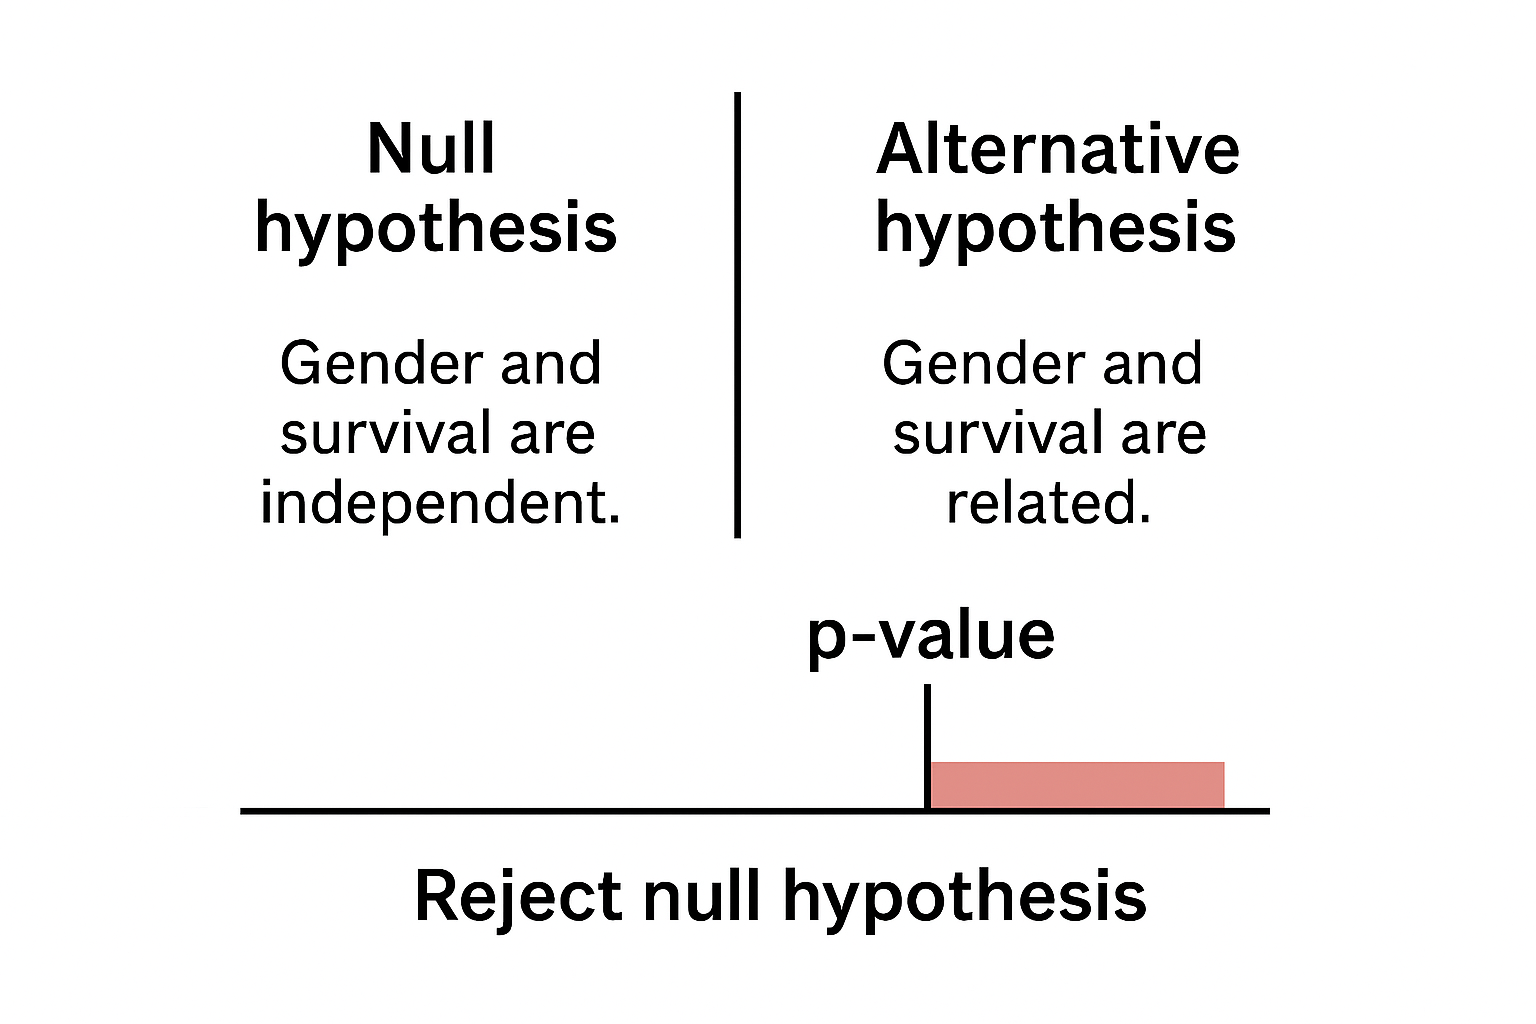

chi2_stat: This variable stores the chi-square statistic, which is a measure of the association or independence between two categorical variables. It tells you how much the observed frequencies in your contingency table differ from the frequencies you would expect if the two variables were independent.

p_val: This variable stores the p-value associated with the chi-square test. The p-value helps you determine the significance of the association or independence between the variables. A low p-value (typically below a chosen significance level, e.g., 0.05) indicates a significant association.

dof: This variable stores the degrees of freedom. It represents the number of values in the final calculation of the chi-square statistic that are free to vary. In a chi-square test for independence, the degrees of freedom are calculated based on the dimensions of the contingency table. For a 2x2 table, the degrees of freedom would typically be 1.

ex: This variable stores the expected frequencies. In the context of a chi-square test, it represents the frequencies that you would expect to see in each cell of the contingency table if the two variables were independent. The comparison between the observed (actual) frequencies and the expected frequencies is what the chi-square test is based on.

Your code snippet calculates the chi-square statistic, p-value, degrees of freedom, and expected frequencies for a chi-square test performed on the data in the PClass_survd contingency table. These results are used to assess the association between the two categorical variables in the table.